In [1]:
#importing image procssing and data handling libraries
import cv2
import pandas as pd

In [2]:
import numpy as np

In [3]:
#Function to import images as numpy arrays and store them in a list
import os

def load_images_from_folder(foldername):
    images = []
    for filename in os.listdir(foldername):
        img = cv2.imread(os.path.join(foldername,filename))
        
        img=cv2.resize(img,(224,224),3)
        if img is not None:
            images.append(img)
    return images
img_list=load_images_from_folder("C:/Users/ameyt/Desktop/fliprobo/image classification/images")

In [4]:
#array representation of images
img_list[0]

array([[[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]]], dtype=uint8)

In [5]:
#converting list to array as tensorflow accepts np arrays
arr = np.asarray(img_list)

In [6]:
import matplotlib.pyplot as plt

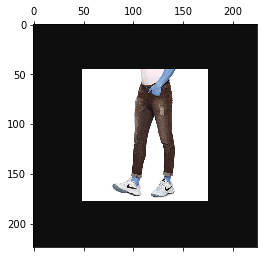

In [7]:
plt.matshow(img_list[0])

In [8]:
arr.shape

(877, 224, 224, 3)

In [9]:
#creating taregt list
classes=[]
for i in range(0,len(img_list)):
    if i<301:
        classes.append(1)
    elif 300<i<589:
        classes.append(0)
    else:
        classes.append(2)

In [10]:
cls_arr=np.asarray(classes)

In [11]:
classes[-1]

2

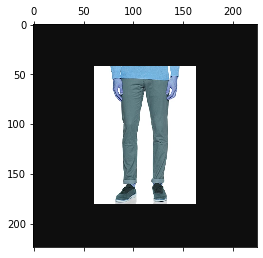

In [12]:
plt.matshow(img_list[-1])

In [13]:
#diving data in train and test data
from sklearn.model_selection import train_test_split
x=arr
y=cls_arr
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20,random_state=43)

In [14]:
type(x_train)

numpy.ndarray

In [15]:
x_train.shape

(701, 224, 224, 3)

In [16]:
x_train[0]

array([[[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       ...,

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]],

       [[14, 14, 14],
        [14, 14, 14],
        [14, 14, 14],
        ...,
        [14, 14, 14],
        [14, 14, 14],
        [14, 14, 14]]], dtype=uint8)

In [17]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([1, 1, 2, 2, 2])

In [18]:
y_test=y_test.reshape(-1,)

In [19]:
#scaling down the data 
x_train=x_train/255
x_test=x_test/255

In [20]:
x_train[0]

array([[[0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0.05490196, 0.05490196],
        ...,
        [0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0.05490196, 0.05490196]],

       [[0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0.05490196, 0.05490196],
        ...,
        [0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0.05490196, 0.05490196]],

       [[0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0.05490196, 0.05490196],
        ...,
        [0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0.05490196, 0.05490196]],

       ...,

       [[0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0.05490196, 0.05490196],
        [0.05490196, 0

In [21]:
#checking shape of each array to feed to input layer
x_train[0].shape

(224, 224, 3)

In [22]:
#importing libraries required to build DL models and result visualization
import tensorflow as tf
from tensorflow.keras import layers, models
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [23]:
ann_model=models.Sequential()

In [24]:
#input layer
ann_model.add(layers.Flatten(input_shape=(224, 224, 3)))

In [25]:
#Hidden layers and output layer
ann_model.add(layers.Dense(300, activation='relu'))
ann_model.add(layers.Dense(100, activation='relu'))
ann_model.add(layers.Dense(3, activation='softmax'))

In [26]:
#compiling model
ann_model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
#training model on train data
ann_model.fit(x_train,y_train,epochs=10)

Epoch 1/10
22/22 [==============================] - 5s 211ms/step - loss: 1.8198 - accuracy: 0.4394
Epoch 2/10
22/22 [==============================] - 5s 220ms/step - loss: 0.8672 - accuracy: 0.5464
Epoch 3/10
22/22 [==============================] - 5s 231ms/step - loss: 0.6983 - accuracy: 0.6419
Epoch 4/10
22/22 [==============================] - 5s 234ms/step - loss: 0.5963 - accuracy: 0.6919
Epoch 5/10
22/22 [==============================] - 5s 216ms/step - loss: 0.5942 - accuracy: 0.6876
Epoch 6/10
22/22 [==============================] - 5s 215ms/step - loss: 0.6254 - accuracy: 0.6748
Epoch 7/10
22/22 [==============================] - 5s 215ms/step - loss: 0.5379 - accuracy: 0.7361
Epoch 8/10
22/22 [==============================] - 5s 219ms/step - loss: 0.5492 - accuracy: 0.6890
Epoch 9/10
22/22 [==============================] - 4s 200ms/step - loss: 0.5029 - accuracy: 0.7389
Epoch 10/10
22/22 [==============================] - 4s 204ms/step - loss: 0.5265 - accuracy: 0.7304

In [28]:
#predicting classes for test data
y_pred_ann=ann_model.predict(x_test)

In [29]:
y_predicted_labels_ann=[np.argmax(i) for i in y_pred_ann]

In [30]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_ann)
cm

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[68,  0,  1],
       [ 0, 38, 15],
       [ 2, 21, 31]])>

<AxesSubplot:>

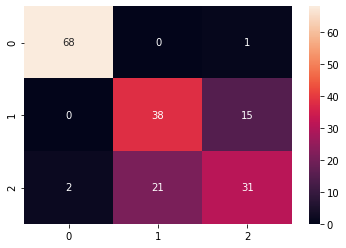

In [31]:
#visualizing the results
sns.heatmap(cm,annot=True)

In [32]:
cnn_model=models.Sequential()
#input layer
cnn_model.add(layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
cnn_model.add(layers.MaxPool2D((2,2)))

cnn_model.add(layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
cnn_model.add(layers.MaxPool2D((2,2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(64,activation='relu'))
#output layer
cnn_model.add(layers.Dense(3,activation='softmax'))

In [33]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
cnn_model.fit(x_train,y_train,epochs=10)

Epoch 1/10
22/22 [==============================] - 38s 2s/step - loss: 1.3188 - accuracy: 0.5464
Epoch 2/10
22/22 [==============================] - 38s 2s/step - loss: 0.5038 - accuracy: 0.7589
Epoch 3/10
22/22 [==============================] - 39s 2s/step - loss: 0.3699 - accuracy: 0.8245
Epoch 4/10
22/22 [==============================] - 38s 2s/step - loss: 0.3097 - accuracy: 0.8631
Epoch 5/10
22/22 [==============================] - 37s 2s/step - loss: 0.2412 - accuracy: 0.9073
Epoch 6/10
22/22 [==============================] - 37s 2s/step - loss: 0.1960 - accuracy: 0.9301
Epoch 7/10
22/22 [==============================] - 38s 2s/step - loss: 0.1768 - accuracy: 0.9358
Epoch 8/10
22/22 [==============================] - 38s 2s/step - loss: 0.1213 - accuracy: 0.9700
Epoch 9/10
22/22 [==============================] - 38s 2s/step - loss: 0.1116 - accuracy: 0.9615
Epoch 10/10
22/22 [==============================] - 37s 2s/step - loss: 0.0881 - accuracy: 0.9729


In [35]:
#predicting classes for test data
y_pred_cnn=cnn_model.predict(x_test)

In [36]:
y_predicted_labels_cnn=[np.argmax(i) for i in y_pred_cnn]

In [37]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_cnn)
cm

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[69,  0,  0],
       [ 0, 42, 11],
       [ 1,  8, 45]])>

<AxesSubplot:>

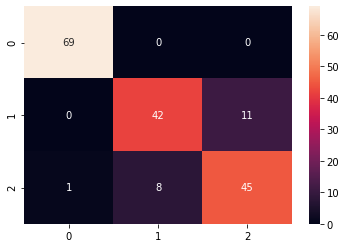

In [38]:
#visualizing the result
sns.heatmap(cm,annot=True)